In [1]:
import numpy as np

import netCDF4
from netCDF4 import Dataset

import glob

import pandas as pd

import matplotlib.pyplot as plt
import os
os.environ["PROJ_LIB"] = "C:/ProgramData/Anaconda3/Library/share"
from mpl_toolkits.basemap import Basemap
import numpy.ma as ma
from numpy import meshgrid

1. Rainfall data was obtained from the APHRODITE Website - aphrodite.st.hirosaki-u.ac.jp

2. Rainfall data available as a netCDF file (.nc)

3. Reading the .nc data using the python netCDF4 package and plotting the data for a specified region

In [2]:
# Data accessed from - http://aphrodite.st.hirosaki-u.ac.jp/product/APHRO_V1801_R1/APHRO_MA/025deg_nc/

# read the downloaded data
data = Dataset('APHRO_MA_025deg_V1801R1.2011.nc','r')

print(data.variables.keys())

lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
time = data.variables['time'][:]
precip = data.variables['precip'][:]

print(len(lon))
print(len(lat))
print(data.variables['time'].units)
print(np.shape(precip))

odict_keys(['lon', 'lat', 'time', 'precip', 'rstn'])
360
280
minutes since 2011-01-01 00:00
(365, 280, 360)


(361,) (361, 281) (361, 281)
(281,) (361, 281) (361, 281)


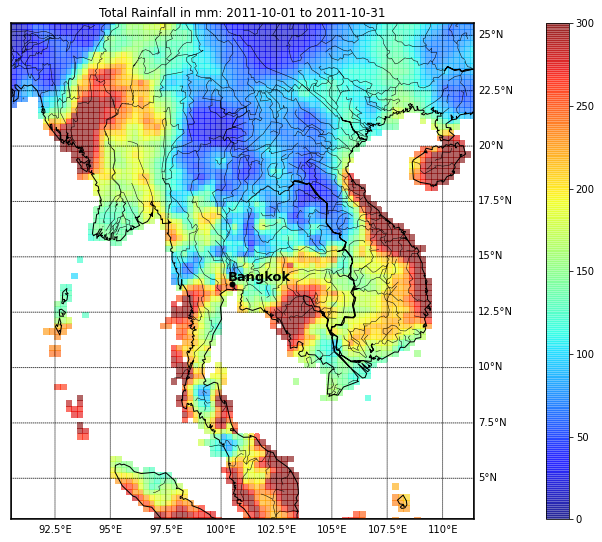

In [3]:
# Open the netCDF dataset
data = Dataset('APHRO_MA_025deg_V1801R1.2011.nc','r')

# Save the data into variables
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
time = data.variables['time'][:]
precip = data.variables['precip'][:]

# get the relevant index for a given date
# the data has 365 daily timesteps, starting from 2011-01-01 00:00
# ts-start time, tf - finish/end time
ts_string = '2011-10-01'
tf_string = '2011-10-31'
ts = pd.Series(pd.to_datetime([ts_string +' 00:00:00']))
tf = pd.Series(pd.to_datetime([tf_string + ' 00:00:00']))
tsIndex = ts.dt.dayofyear.astype(np.int)
tfIndex = tf.dt.dayofyear.astype(np.int)

# generating the grid using lon and lat values
# https://nbviewer.jupyter.org/github/guziy/PyNotebooks/blob/master/pcolormesh_example.ipynb
dx = ((lon[-1]-lon[0]))/float(len(lon)-1)
dy = ((lat[-1] - lat[0])) / float(len(lat) - 1)

lons_p1 = list(lon) + [lon[-1] + dx, ]
lons_m1 = [lon[0] - dx] + list(lon)
lons_corn = [(a + b) / 2.0 for a, b in zip(lons_p1, lons_m1) ]

lats_p1 = list(lat) + [lat[-1] + dy, ]
lats_m1 = [lat[0] - dy] + list(lat)
lats_corn = [(a + b) / 2.0 for a, b in zip(lats_p1, lats_m1) ]

lat2d, lon2d = np.meshgrid(lats_corn, lons_corn)

# create the basemap
mp = Basemap( llcrnrlon = 90.5,llcrnrlat = 3.1401,
             urcrnrlon = 111.4,
             urcrnrlat = 25.55, resolution = 'l', epsg = '4326')

# define meridians(lons) and parallels(lats) to be displayed on the map
meridians = np.arange(-180, 180, 2.5)
parallels = np.arange(-90, 90, 2.5)

# create x and y values based on lon and lat 
x,y = mp(lon2d, lat2d)

print(np.shape(lons_corn),np.shape(lon2d),np.shape(x))
print(np.shape(lats_corn),np.shape(lat2d),np.shape(y))
# create plot
plt.figure(figsize=(10, 10))

# plotting the data
pdata = np.transpose(sum(precip[tsIndex[0]:tfIndex[0]]))
mp.pcolormesh(x,y,pdata, cmap = 'jet', vmin = 0, vmax = 300, alpha = 0.6)

# plot Bangkok as a point on the map
lonBangkok = 100.5018
latBangkok = 13.7563
xb,yb = mp(lonBangkok,latBangkok)
mp.plot(xb,yb,'k.',markersize=10)
plt.text(xb-0.2,yb+0.15,'Bangkok',fontsize =13, fontweight = 'demi')
#mp.etopo()
#mp.arcgisimage(service='World_Street_Map', xpixels=int(10000), verbose=True, zorder=1)
# Add colourbar and other attributes to the map
mp.colorbar(pad=1.0)
mp.drawcountries()
mp.drawcoastlines()
mp.drawrivers()
mp.drawmapboundary(linewidth=1.5)
mp.drawmeridians(meridians,labels=[True,False,False,True])
mp.drawparallels(parallels,labels=[False,True,True,False])
plt.title('Total Rainfall in mm: '+ ts_string+ ' to '+ tf_string)
# save the map into a figure
plt.savefig(ts_string+ ' to '+ tf_string + '_' + 'TotalPrecipitation.jpg')
